#**A Regression-Based Assessment of Revenue Growth Percentages**

---

By: *Pedram* *Bazargani*

**Data Description:** This data consists of 7 columns and 100 rows, listing the top 100 American companies by Revenue (USD), according to the 2023 Fortune 500 list published by Fortune Magazine. The list was scraped off Wikipedia and has a usability score of 10.00 on Kaggle. The data was provided in CSV format and was prepped and cleaned for via the Alteryx Designer Platform. Tools utilized include the Data Cleansing, Select, and Formula tools. The data was then outputed back into csv file format and loaded to this notebook on Google Colab.

**Source:** https://www.kaggle.com/datasets/claymaker/us-largest-companies

**Motivations and Findings:** During my undergrad courses in econometrics I learned a lot about building and interpreting regressions. To showcase my obtained technical accumen I searched Kaggle for some fun data I could work with and shortly found this data on 2023 Fortune 500 Companies published by Fortune.

The column I found most interesting was the data on Revenue Growth Percentages. Although I recognize that revenue growth is determined primarily by market conditions, investor sentiments, and numerous finacial metrics, I wanted to see to what extent do the number of employees a company have impact its revenue growth percentage. I further expanded my research to include the Industry and Location columns and also decided to run a few fun statistics regarding the data at the end of this notebook.

My regressions demonstrated that the number of employees have minimal impact on revenue growth percentage. Even though adding categorical variables 'Industry' and 'Headquarters (as State)' to the regression via one-hot encoding did result in a larger goodness of fit indicating possible correlation, ultimately these findings may possibly be inconclusive due to issues of multicollinearity.


In [25]:
#Importing Packages; Loading Data; Creating a DataFrame

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Fortune500CleanedData.csv')
df = pd.DataFrame(data)
print(df)


    Rank                      Name                    Industry  \
0      1                   Walmart                      Retail   
1      2                    Amazon  Retail and Cloud Computing   
2      3               Exxon Mobil          Petroleum industry   
3      4                     Apple        Electronics industry   
4      5        UnitedHealth Group                  Healthcare   
..   ...                       ...                         ...   
95    96                  Best Buy                      Retail   
96    97       BristolMyers Squibb     Pharmaceutical industry   
97    98           United Airlines                     Airline   
98    99  Thermo Fisher Scientific      Laboratory instruments   
99   100                  Qualcomm                  Technology   

    Revenue (USD millions)  Revenue growth  Employees             Headquarters  
0                   611289           0.067    2100000    Bentonville, Arkansas  
1                   513983           0.094   

In [9]:
#Calculating the correlation between 'Employees' and 'Revenue Growth Percentage (RGP)'
correlation_coefficient = df['Employees'].corr(df['Revenue growth'])

print(f"Correlation coefficient between number of employees and revenue growth percentages (RGP): {correlation_coefficient:.3f}")

# Interpreting the correlation coefficient
if 0.7 <= correlation_coefficient <= 1:
    interpretation = "strong positive correlation"
elif 0.3 < correlation_coefficient < 0.7:
    interpretation = "moderate positive correlation"
elif 0 < correlation_coefficient <= 0.3:
    interpretation = "weak positive correlation"
elif -0.3 < correlation_coefficient <= 0:
    interpretation = "weak negative correlation"
elif -0.7 < correlation_coefficient <= -0.3:
    interpretation = "moderate negative correlation"
else:
    interpretation = "strong negative correlation"

print(f"There's a {interpretation} between the number of employees and revenue growth percentage.")
print("\n")
print("This suggests that there may be a weak inverse relationship in that companies with more employees may experience a lower RGP and vice versa.")

Correlation coefficient between number of employees and revenue growth percentages (RGP): -0.230
There's a weak negative correlation between the number of employees and revenue growth percentage.


This suggests that there may be a weak inverse relationship in that companies with more employees may experience a lower RGP and vice versa.


In [10]:
#Performing simple linear regression (OLS) analysis to understand the impact of the number of employees on RGP
X = df['Employees']
y = df['Revenue growth']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Revenue growth   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.478
Date:                Sun, 27 Aug 2023   Prob (F-statistic):             0.0213
Time:                        23:15:28   Log-Likelihood:                 15.210
No. Observations:                 100   AIC:                            -26.42
Df Residuals:                      98   BIC:                            -21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2263      0.025      9.155      0.0

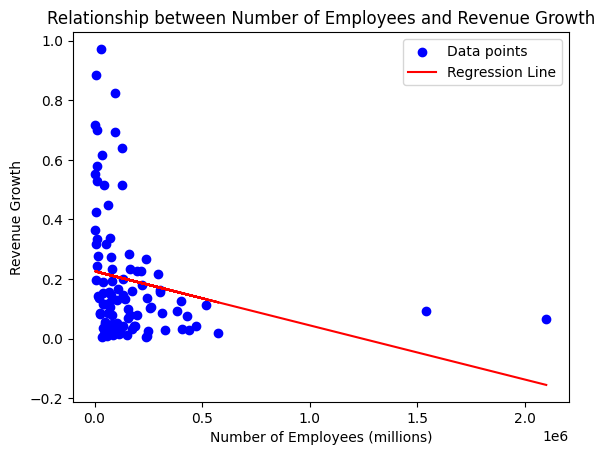

In [ ]:
#Plotting the scatter plot with regression line
plt.scatter(df['Employees'], df['Revenue growth'], color='blue', label='Data points')
plt.plot(df['Employees'], predictions, color='red', label='Regression Line')
plt.xlabel('Number of Employees (millions)')
plt.ylabel('Revenue Growth')
plt.title('Relationship between Number of Employees and Revenue Growth')
plt.legend()
plt.show()

In [ ]:
#Performing Polynomial Regression to Capture non-linear relationship
df['Employees_squared'] = df['Employees'] ** 2

x_poly = df[['Employees', 'Employees_squared']]
x_poly = sm.add_constant(x_poly)

model2 = sm.OLS(y, x_poly).fit()
print("\nPolynomial Regression:\n", model2.summary())



Polynomial Regression:
                             OLS Regression Results                            
Dep. Variable:         Revenue growth   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     7.144
Date:                Sun, 27 Aug 2023   Prob (F-statistic):            0.00128
Time:                        18:21:20   Log-Likelihood:                 19.361
No. Observations:                 100   AIC:                            -32.72
Df Residuals:                      97   BIC:                            -24.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const        

In [ ]:
#Log-Transformed Regression
df['log_Employees'] = np.log(df['Employees'])

X_log = df['log_Employees']
X_log = sm.add_constant(X_log)

model3 = sm.OLS(y, X_log).fit()
print("\nLog-transformed Regression:\n", model3.summary())



Log-transformed Regression:
                             OLS Regression Results                            
Dep. Variable:         Revenue growth   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     30.86
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           2.38e-07
Time:                        18:23:21   Log-Likelihood:                 26.180
No. Observations:                 100   AIC:                            -48.36
Df Residuals:                      98   BIC:                            -43.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

In [6]:
#Adding Categorical variables 'Industry' and 'Headquarters (as State)' to Regression for a Richer model
df['State'] = df['Headquarters'].str.split(', ').str[-1]

#One-hot encoding for 'Industry' and 'State'
industry_dummies = pd.get_dummies(df['Industry'], drop_first=True, prefix='Industry')
state_dummies = pd.get_dummies(df['State'], drop_first=True, prefix='State')

df_encoded = pd.concat([df, industry_dummies, state_dummies], axis=1)
X = df_encoded[['Employees'] + list(industry_dummies.columns) + list(state_dummies.columns)]
X = sm.add_constant(X)
y = df['Revenue growth']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Revenue growth   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3.932
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           9.59e-06
Time:                        22:39:13   Log-Likelihood:                 111.96
No. Observations:                 100   AIC:                            -99.92
Df Residuals:                      38   BIC:                             61.60
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

#Potential Issues
This multivariable regression can result in Multicollinearity where two or more variables are highly correlated. It is important to note that adding irrelevant variables to a regression model often causes the coefficient estimates to become less precise, therefore losing precision in the overall model.

# ***Fun Statistics on 2023 Fortune 500 Company Data***

In [23]:
#Which industries are most represented in the top 20 companies by revenue?
industry_counts = df['Industry'].value_counts()
print("Industries most represented in top 20: ")
print(industry_counts)
print('\n')

#Which companies have the highest and lowest revenue growth?
max_growth_company = df.loc[df['Revenue growth'].idxmax()]['Name']
min_growth_company = df.loc[df['Revenue growth'].idxmin()]['Name']
max_growth_value = df.loc[df['Revenue growth'].idxmax()]['Revenue growth']
min_growth_value = df.loc[df['Revenue growth'].idxmin()]['Revenue growth']

print(f"\nCompany with highest revenue growth: {max_growth_company} with a growth rate of {max_growth_value * 100:.2f}%")
print(f"Company with lowest revenue growth: {min_growth_company} with a growth rate of {min_growth_value * 100:.2f}%")

#Which companies have the highest and lowest employee counts?

max_employees_row = df.loc[df['Employees'].idxmax()]
min_employees_row = df.loc[df['Employees'].idxmin()]
max_employees_company = max_employees_row['Name']
max_employees_count = max_employees_row['Employees']
min_employees_company = min_employees_row['Name']
min_employees_count = min_employees_row['Employees']

print('\n')
print(f"Company with most employees: {max_employees_company} with {max_employees_count:,} employees")
print(f"Company with least employees: {min_employees_company} with {min_employees_count:,} employees")


#What is the average revenue and revenue growth for companies headquartered in different states?
df['State'] = df['Headquarters'].str.split(', ').str[1]
average_revenue_by_state = df.groupby('State')['Revenue (USD millions)'].mean()
average_growth_by_state = df.groupby('State')['Revenue growth'].mean()

print("\nAverage revenue by state:")
print(average_revenue_by_state)
print("\nAverage revenue growth by state:")
print(average_growth_by_state)


Industries most represented in top 20: 
Financials                          11
Retail                              10
Petroleum industry                  10
Technology                           8
Pharmaceutical industry              7
Healthcare                           6
Insurance                            5
Conglomerate                         4
Telecommunications                   3
Airline                              3
Transportation                       2
Food industry                        2
Health Insurance                     2
Financial                            2
Food Processing                      2
Chemical industry                    1
Petroleum industry and Logistics     1
Machinery                            1
Agriculture manufacturing            1
Aerospace and Defense                1
Telecom Hardware Manufacturing       1
Agriculture cooperative              1
Apparel                              1
Infotech                             1
Automotive and Energy   